Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
#math overlay the panda
import pandas as pd
#pandas help with csv, labels with columns
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('./data2.txt', header= None)
df.columns =['X', 'Y']
df['intercept'] = 1

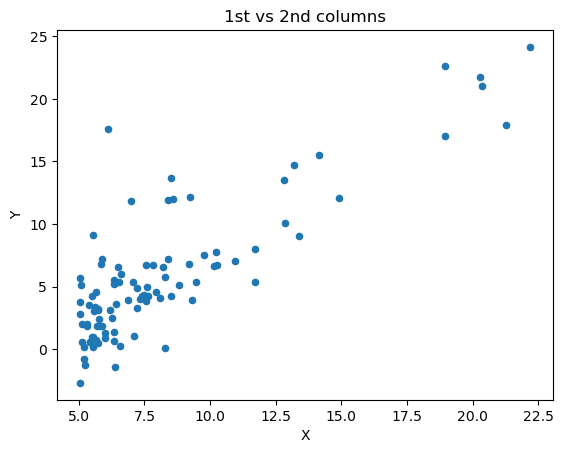

In [3]:
df.plot.scatter(x='X', y='Y')
plt.title('1st vs 2nd columns')
plt.show()

3.2 use Python to implement the following methods to find the coefficients: 2) Normal equation

In [4]:
denomintor = df['X'] *df['X']
numerator = df['X'] * df['Y']

def find_theta(X, y):
    m = X.shape[0] # Number of training examples. 
    y = y.reshape(m,1)
    
    #the normal eqution
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return theta

In [5]:
X = df[['X', 'intercept']].values
y = df['Y'].values

theta = find_theta(X, y)
theta

array([[ 1.19303364],
       [-3.89578088]])

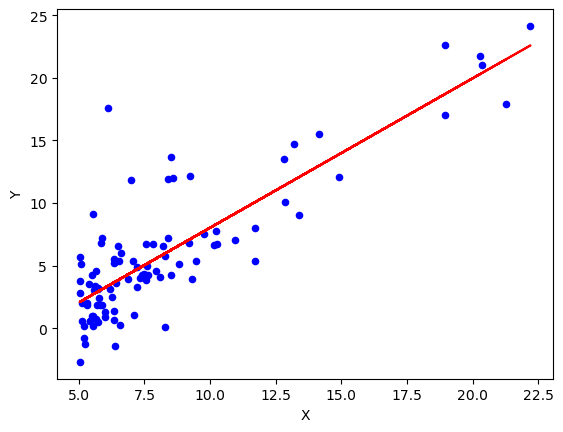

In [6]:
y_predicted = (1.19303364 * df['X']) + -3.89578088

df.plot(kind='scatter', x='X', y='Y', color='blue')
plt.plot(df['X'], y_predicted,'-',color='red')
plt.show()

3.3
and use Python to implement the following methods to find the coefficients:

3) Gradient Descent using batch AND stochastic modes respectively:
a) Split dataset into 80% for training and 20% for testing.



In [7]:
#training dataset
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['Y'], test_size=0.2, random_state=42)

b) Plot MSE vs. iteration of each mode for both training set and testing set (i.e., batch – training and testing; stochastic – training and testing). Compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.)

In [8]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta


In [9]:
def predict_Y(b,theta,X):
    return b + np.dot(X, theta[0])

In [10]:
import math
def get_cost(Y,Y_hat):
    Y_resd = Y - Y_hat
    return np.sum(np.dot(Y_resd.T, Y_resd)) / len(Y - Y_resd)

In [11]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    delta_bias = (np.sum(y_hat-y)*2) / y.size
    delta_weights = (np.dot((y_hat-y),x)*2) / y.size

    b_1 = b_0 - (learning_rate * delta_bias)
    theta_1 = theta_o - (learning_rate * delta_weights)

    return b_1, theta_1

BATCH SGD

In [12]:
b, theta=initialize(2)
print('Bias: ',b,'Weights: ',theta)

running_cost_train = []
Y_hat_train = predict_Y(b, theta, X_train)

running_cost_test = []
Y_hat_test = predict_Y(b, theta, X_test)

LEARNING_RATE = 0.001
for step in range(2000):
    b, theta=update_theta(X_train, y_train, Y_hat_train, b, theta, LEARNING_RATE)
    Y_hat_train = predict_Y(b, theta, X_train)
    current_cost_train = get_cost(y_train, Y_hat_train)
    running_cost_train.append(current_cost_train)

    Y_hat_test = predict_Y(b, theta, X_test)
    current_cost_test = get_cost(y_test, Y_hat_test)
    running_cost_test.append(current_cost_test)

print("Step: ",step,'b:', b, 'theta:', theta, 'cost:', current_cost_test)
    

Bias:  0.4866851383278148 Weights:  [0.99723748 0.57731131]
Step:  1999 b: -2.0683935389422836 theta: [1.01483416 0.59490799] cost: 13.397012652317468


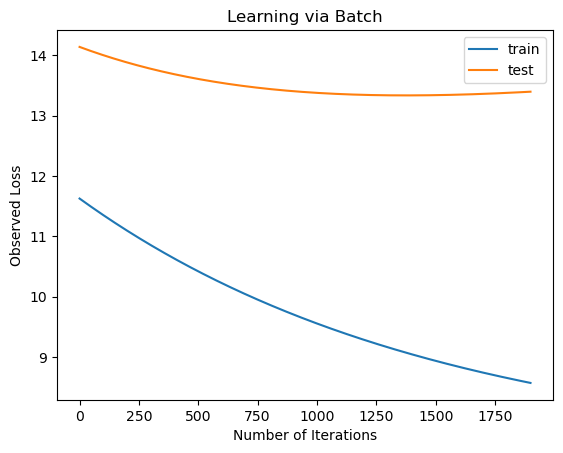

In [13]:
plt.plot(running_cost_train[100:], label='train')
plt.plot(running_cost_test[100:], label='test')
plt.title('Learning via Batch')
plt.xlabel('Number of Iterations')
plt.ylabel('Observed Loss')
plt.legend()
#not getting better after 1000 iterations since test is going up

Stochastic SGD

In [23]:
import random
b, theta=initialize(2)
print('Bias: ',b,'Weights: ',theta)

running_cost_train = []
Y_hat_train = predict_Y(b, theta, X_train)

running_cost_test = []
Y_hat_test = predict_Y(b, theta, X_test)

LEARNING_RATE = 0.00005
for step in range(1500):
    for i in range(X_train.shape[0]):
        random_stochastic_index = i
        b, theta=update_theta(
            X_train.iloc[random_stochastic_index], 
            y_train.iloc[random_stochastic_index], 
            Y_hat_train[random_stochastic_index], 
            b, theta, LEARNING_RATE)
        Y_hat_train = predict_Y(b, theta, X_train)
    current_cost_train = get_cost(y_train, Y_hat_train)
    running_cost_train.append(current_cost_train)

    Y_hat_test = predict_Y(b, theta, X_test)
    current_cost_test = get_cost(y_test, Y_hat_test)
    running_cost_test.append(current_cost_test)

print("Step: ",step,'b:', b, 'theta:', theta, 'cost:', current_cost_test)
    
 

Bias:  0.3890781930878193 Weights:  [0.48894161 0.87954718]
Step:  1499 b: -4.018042214528722 theta: [1.21536198 1.60596755] cost: 14.768349866369993


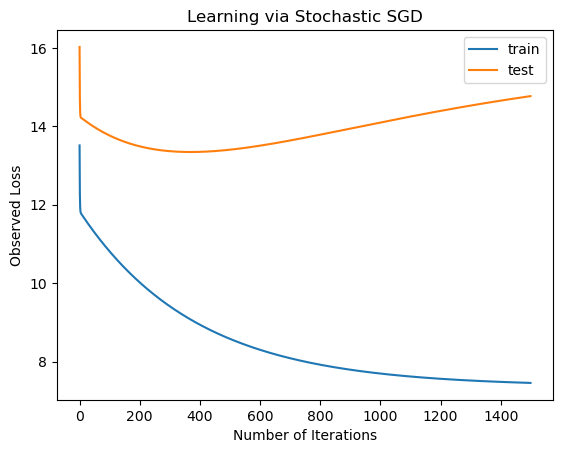

In [24]:
plt.plot(running_cost_train, label='train')
plt.plot(running_cost_test, label='test')
plt.title('Learning via Stochastic SGD')
plt.xlabel('Number of Iterations')
plt.ylabel('Observed Loss')
plt.legend()

A. Comparing Both the Gradient Descent on Batch Versus Stochastic. We can see in both Batch and Conversions that after the training of a certain amount the line has an increase in observed Loss. The Relationship between Train and test can be seen much more evident in the Batch SGD where one can see at around a 1,000 iterations the training curve slpes down and the testing line evens out and then eventually appears to have a slight upslope. This indicates that the cost function J at that particular interval does not really change. With Stochastic we can see a similar behavior here we can also see that around 1000 iterations our line starts to even out, and then starts to pick back up. The orange test line starts to trend upward whereas the cost function shows to be leveling out. 

B.Accuracy and Speed
Comparing both the Batch Mode and Stochastic Mode for Gradient Descent it appears that Batch Mode is much more accurate and has a better converging rate. Based on the definition of Stochastic Gradient Descent it should take less amount for the output to be generated, since we are using a random int instead of a full Batch. I noticed that with my algorithm, that was not the case. Stochastic seemed to be running much longer than Batch. 

C. Best Learning Rate

In order to determine this , we have to look at whatever learning rate has the lowest MSE. Based on the question C where I plotted MSE vs. Learning rate it shows that for Batch Mode, most of the learning rates are very clsoe to each other.According to the data, .003 seems to be the lowest, but really anything from .001 to .005 has a very low range and these learning rates are so close to each other. 

For Stochastic Batch a different scenario happened, here compared to Batch we have a huge learning rate jump compared to the small jumps in Batch Mode. Here we can see the best learning rate is .001

c) Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005,
0.006, 0.007, 0.008, 0.009, 0.01) and determine the best learning rate.

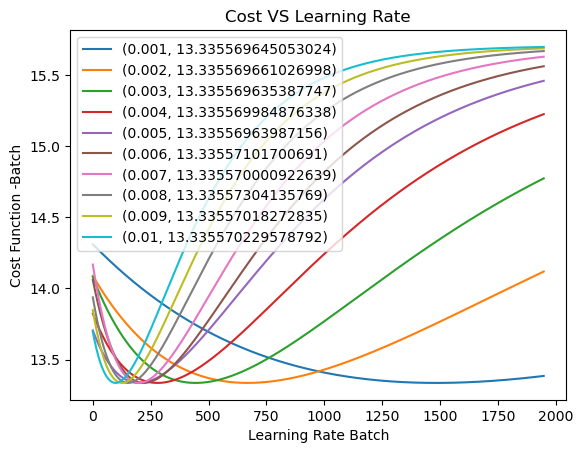

In [28]:
#BATCH

learning_rate_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
#2 is the number of features

    
for i in learning_rate_list:
    #2 is the number of features
    #gives the random bias/weights
    b, theta=initialize(2)
    batch_cost_function = []
    #train the model
    for step in range(2000):
        b, theta=update_theta(X_train, y_train, Y_hat_train, b, theta, i)
        Y_hat_train = predict_Y(b, theta, X_train)
        

        Y_hat_test = predict_Y(b, theta, X_test)
        current_cost_test = get_cost(y_test, Y_hat_test)
        batch_cost_function.append(current_cost_test)
    plt.plot(batch_cost_function[50:], label=(i,min(batch_cost_function)))

    
#Values for Graph
#print("Cost function for Batch List: ", "for" , i, , "=", ) 

plt.xlabel("Learning Rate Batch")
plt.ylabel("Cost Function -Batch")
plt.title("Cost VS Learning Rate")
plt.legend()
plt.show()
    
#the higher the learning rate the faster you drop to the mean squared error
#.008 is the lowest

    



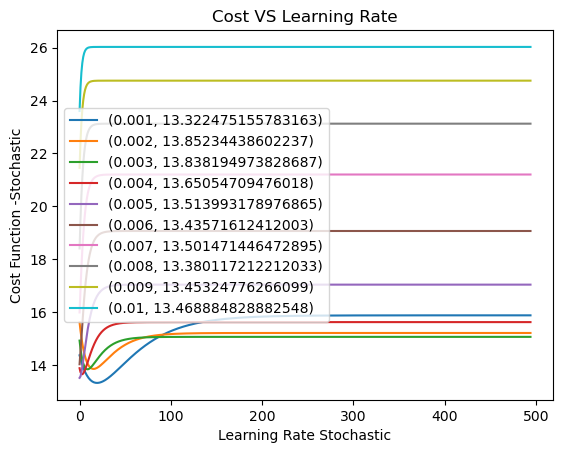

In [26]:
#Stochastic 
learning_rate_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
#2 is the number of features

    
for lr in learning_rate_list:
    #2 is the number of features
    #gives the random bias/weights
    b, theta=initialize(2)
    stochastic_cost_function = []
    #train the model
    for step in range(500):
        for i in range(X_train.shape[0]):
           # random_stochastic_index = random.randint(0, X_train.shape[0]-1)  # this might repeat observations!
            random_stochastic_index = i
            b, theta=update_theta(
                X_train.iloc[random_stochastic_index], 
                y_train.iloc[random_stochastic_index], 
                Y_hat_train[random_stochastic_index], 
                b, theta, lr)
        
            Y_hat_train = predict_Y(b, theta, X_train)
        

        Y_hat_test = predict_Y(b, theta, X_test)
        current_cost_test = get_cost(y_test, Y_hat_test)
        stochastic_cost_function.append(current_cost_test)
    plt.plot(stochastic_cost_function[5:], label=(lr,min(stochastic_cost_function)))

    
#Values for Graph
#print("Cost function for Batch List: ", "for" , i, , "=", ) 

plt.xlabel("Learning Rate Stochastic")
plt.ylabel("Cost Function -Stochastic")
plt.title("Cost VS Learning Rate")
plt.legend()
plt.show() 


# high learning rate jumps. 
#if the learning rate is higher the gradient descent 
# results are clearer when not randomizing. 
#.001 is the best Result in this scenario as this has the lowest Larning Rate
# not doing random because we only have 96 samples, and by randomizing our outcome would be much different then the samples
    